In [2]:
import numpy as np
import pandas as pd


In [6]:
!pip install geopy
!pip install geopandas
from geopy.geocoders import Nominatim
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import date

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 994 kB 27.7 MB/s 
     |████████████████████████████████| 6.6 MB 92.7 MB/s 
     |████████████████████████████████| 1.0 MB 81.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [108]:
df = pd.read_csv('/work/SyncVR-EDA/data/Derelict_Vehicle_Dispositions_-_Vehicles.csv')

In [147]:
df

,ISN,DISTRICT_CD,TAG_LOC1,TAG_LOC2,YEAR,MAKE,TYPE,COLOR,TAG_REMARKS,TAG_NO,...,TIMESTMP,CHECKED_DATE,TIMESTMP_UPD,FINAL_DISP_DATE,FINAL_DISP_CD,SE_STATUS,CITY,STATE,STOLEN_INDIC,DOT
0,1648,QN,N/S 41 AVE BET MAIN ST &,COLLEGE PT BLVD,1984.0,MERCUR,4D,RED,CVDASH#EK652957 NOB/UNICB,4109185,...,1995-09-05 10:50:15,19950906.0,1.995101e+13,19950906,RTC,N,NaN,NaN,False,NaN
1,1649,QW,W/S 38 AVE BET 108 & 111,NaN,1978.0,FORD,2D,BROWN,NaN,391103,...,1989-12-21 08:29:38,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,False,NaN
2,1650,QW,IN LOT 14ST AND 34ST,NaN,1982.0,NISSAN,2D,GREY,NaN,391252,...,1989-12-21 08:30:43,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,False,NaN
3,1651,QW,S/S 39 AVE BET 112 & 111,STREET,1980.0,TOYOTA,2D,GREY,NaN,391104,...,1989-12-21 08:35:10,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,False,NaN
4,1652,QW,W/S 91 STREET BET 35 & 34,AVE,1982.0,DODGE,4D,GREY,NaN,391105,...,1989-12-21 08:37:09,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688761,688738,SI,78 WINDOM AVE,BET ROBIN RD AND CEDAR AV,NaN,BUICK,4D,MAROON,MAY RELOC. DUE TO MILLING,5030406,...,2019-09-06 12:17:45,NaN,NaN,99999999,AAA,B,NaN,NaN,False,NaN
688762,688739,BXE,R/S LAFAYETTE AVE BTW,CROSS BX EXWY & HUTCHINSO,NaN,CHEVRO,PT,BLACK,NaN,2230448,...,2019-09-06 12:23:35,NaN,NaN,99999999,AAA,B,NaN,NaN,False,NaN
688763,688740,QN,I/F/O 33 49 161 ST B/W,33 AVE &35 AVE,NaN,INFINT,4D,GRAY,NaN,4226661,...,2019-09-06 12:43:24,NaN,NaN,99999999,AAA,B,NaN,NaN,False,NaN
688764,688741,SI,1435 TRAVIS AVE,VICTORYBLVD- SOUTH AVE,NaN,PIONEE,TR,WHITE,RV TRAILER IN PARKING LOT,5033206,...,2019-09-06 13:00:07,NaN,NaN,99999999,AAA,B,NaN,NaN,False,NaN


In [109]:
rename = {}
for i in df.columns.values:
    if i == 'ISN':
        rename[i]=i
    else:
        rename[i] = i[4:]


In [110]:
df.rename(columns = rename, inplace=True)

In [116]:
df.isna().mean()

ISN                0.000000
DISTRICT_CD        0.000000
TAG_LOC1           0.000003
TAG_LOC2           0.241994
YEAR               0.284409
MAKE               0.010382
TYPE               0.000000
COLOR              0.000000
TAG_REMARKS        0.611722
TAG_NO             0.000000
TAG_DATE           0.000000
TAG_TIME           0.000000
TIMESTMP           0.000000
CHECKED_DATE       0.265145
TIMESTMP_UPD       0.010448
FINAL_DISP_DATE    0.000000
FINAL_DISP_CD      0.000000
SE_STATUS          0.150388
CITY               0.781482
STATE              0.781486
STOLEN_INDIC       0.000000
DOT                0.920548
dtype: float64

In [112]:
#Cropping district codes to cover a larger area
df['DISTRICT_CD'] = df['DISTRICT_CD'].apply(lambda x: x[:-2])

In [114]:
#Changing stolen indicator from nan and 'Y' to True and False
df['STOLEN_INDIC'] = df['STOLEN_INDIC'].map({np.nan: False, 'Y': True})

In [123]:
#Changing the timestamp ints to datetime objects
df['TIMESTMP'] = pd.to_datetime(df['TIMESTMP'],format = '%Y%m%d%H%M%S', errors='coerce')

Text(0.5, 1.0, 'Top NY Districts with Derelict Cars')

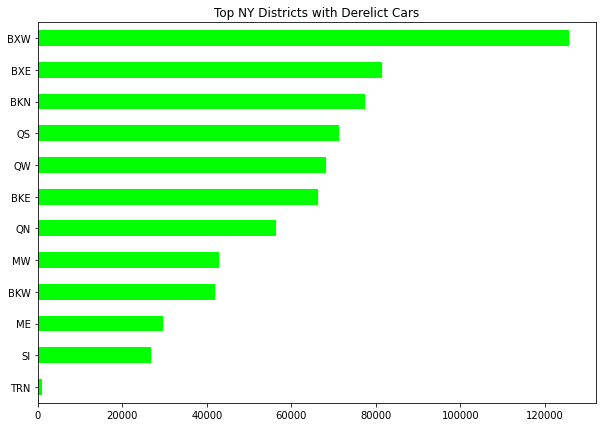

In [124]:
df['DISTRICT_CD'].value_counts()[-3::-1].plot(kind='barh', color = 'lime', figsize = (10,7))
plt.title('Top NY Districts with Derelict Cars')

Grouping by districts, we can see that the most abandoned cars are found in Bronx West, Bronx East, Brooklyn North, Queens South, and so on.

In [ ]:
df['TAG_TIME'] = pd.to_datetime(df['TAG_TIME'], format = '%H%M', errors='coerce')

Text(0.5, 0, 'Hour of the Day')

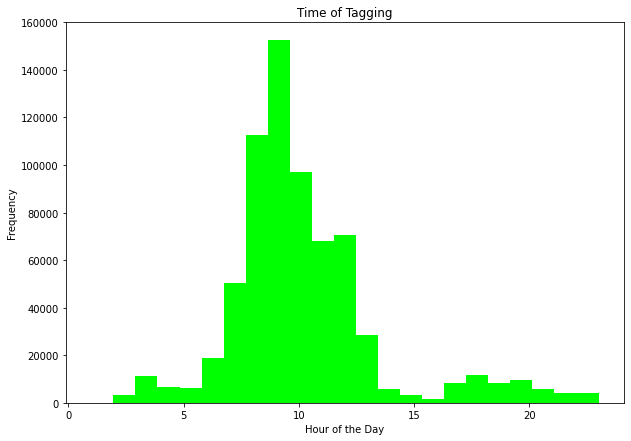

In [146]:
df['TAG_TIME'].apply(lambda x: x.hour).plot(kind = 'hist', bins = 23, color = 'lime', figsize = (10,7))
plt.title('Time of Tagging')
plt.xlabel('Hour of the Day')

It appears that most derelict cars are tagged between the hours of 7am and 1pm and drop significantly during 2pm to 6am.

Text(0.5, 1.0, 'Most Abandoned Car Types')

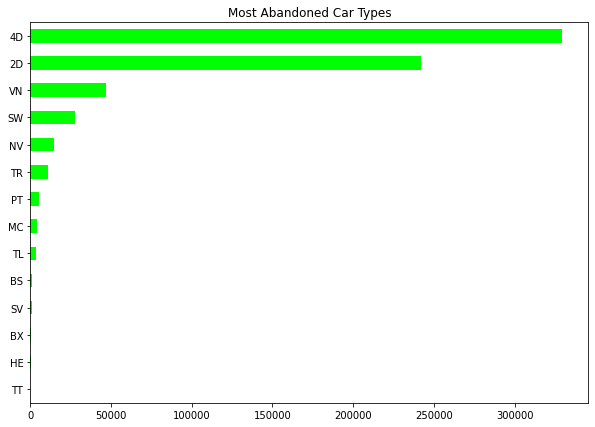

In [155]:
df['TYPE'].value_counts()[::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Most Abandoned Car Types')

The most abandoned car types are 4 door, 2 door, and vans.

In [157]:
#Calculate the age of the vehicle
df['CAR_AGE'] = df['TIMESTMP'].apply(lambda x: x.year) - df['YEAR']

In [189]:
#These are the outlier cars that have mis-entered information on the year
df[(df['CAR_AGE'] > 70) | (df['CAR_AGE'] < -1)]

,ISN,DISTRICT_CD,TAG_LOC1,TAG_LOC2,YEAR,MAKE,TYPE,COLOR,TAG_REMARKS,TAG_NO,...,CHECKED_DATE,TIMESTMP_UPD,FINAL_DISP_DATE,FINAL_DISP_CD,SE_STATUS,CITY,STATE,STOLEN_INDIC,DOT,CAR_AGE
5782,7429,TRN,3RD AVE BETW 2ND AND 3RD,STREETS,1995.0,DATSUN,2D,YELLOW,ENGINE VIN,9000022,...,19990219.0,1.999022e+13,19990219,RTC,A,NaN,NaN,False,NaN,-5.0
657382,656631,BKE,R/S MAPLE ST,TROY X SCHNECTEDY,-6666.0,INTERN,BS,YELLOW,SCHOOL BUS,3216557,...,NaN,2.015103e+13,20151026,OC,B,NaN,NaN,False,NaN,8681.0


Text(0.5, 1.0, 'Age of All Stolen Cars')

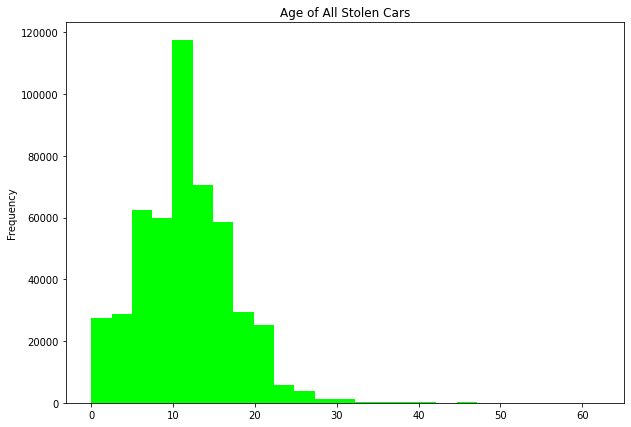

In [208]:

df[(df['CAR_AGE']<70) & (df['CAR_AGE']>-1)]['CAR_AGE'].plot(kind = 'hist', bins = 25, color = 'lime', figsize = (10,7))
plt.title('Age of All Stolen Cars')

Text(0.5, 1.0, 'Age of Stolen Cars')

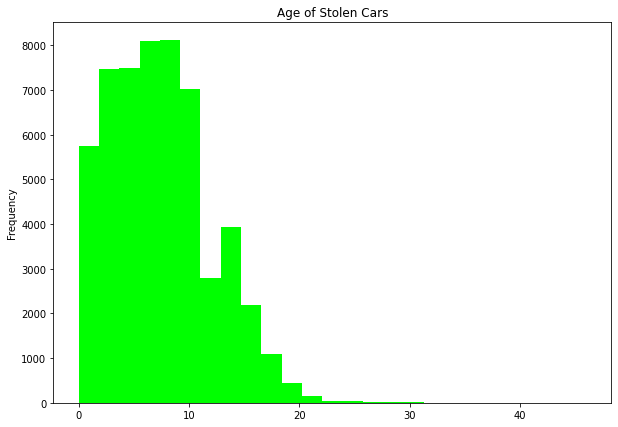

In [209]:
df[(df['CAR_AGE']<70) & (df['CAR_AGE']>-1) & df['STOLEN_INDIC']]['CAR_AGE'].plot(kind = 'hist', bins = 25, color = 'lime', figsize = (10,7))
plt.title('Age of Stolen Cars')

The insight we see from these two graphs is that newer cars are the ones being stolen then abandoned while older cars (around 12+ years old) are being dumped without ever being reported as stolen.

In [172]:
df['CAR_AGE'].describe()

count    492875.000000
mean         11.418646
std          13.579731
min          -5.000000
25%           8.000000
50%          11.000000
75%          15.000000
max        8681.000000
Name: CAR_AGE, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a6fb1c43-fd59-4bf9-b4b7-5bddb3f2c397' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>